### Mass Analysis for 55 analytes
###  Edgar Acuna
#### July 2021

In [1]:
import scipy.io
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline
mat = scipy.io.loadmat('C:/Users/eacun/Downloads/dataset55_release2.mat')

### Loading the data

In [2]:
mat.items()

dict_items([('__header__', b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Jul 22 14:13:11 2020'), ('__version__', '1.0'), ('__globals__', []), ('addedNoisePercent', array([[0.1],
       [0.5],
       [0. ],
       ...,
       [1. ],
       [0.1],
       [0. ]])), ('labels', array([[ 1],
       [ 1],
       [ 1],
       ...,
       [55],
       [55],
       [55]], dtype=uint8)), ('massLoadings', array([[90.48134734],
       [90.48134734],
       [90.48134734],
       ...,
       [93.56603952],
       [93.56603952],
       [93.56603952]])), ('spectra', array([[0.01684698, 0.01575019, 0.01553012, ..., 0.01631328, 0.01523777,
        0.01464116],
       [0.01862416, 0.01217942, 0.02092375, ..., 0.01522821, 0.02158774,
        0.01224737],
       [0.01634829, 0.01627708, 0.01620733, ..., 0.01681628, 0.01679286,
        0.0167685 ],
       ...,
       [0.01777366, 0.02470746, 0.04042846, ..., 0.52899222, 0.53342443,
        0.54125978],
       [0.03112273, 0.02996503, 0.03299245, 

In [3]:
subs=mat['substrateSpectra']
subs=pd.DataFrame(subs)
subs

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
0,0.008192,0.008116,0.008042,0.007970,0.007899,0.007830,0.007763,0.007697,0.007633,0.007570,...,0.010966,0.010943,0.010919,0.010895,0.010870,0.010845,0.010818,0.010792,0.010765,0.010737
1,0.035105,0.035617,0.036458,0.037003,0.037084,0.036102,0.035552,0.035033,0.034687,0.034424,...,0.040834,0.040778,0.040760,0.040794,0.040865,0.040946,0.041008,0.041036,0.041051,0.041070
2,0.585617,0.585672,0.585179,0.584104,0.585759,0.587581,0.588336,0.589407,0.590642,0.591676,...,0.559620,0.559569,0.559520,0.559472,0.559426,0.559382,0.559341,0.559301,0.559264,0.559230
3,0.026414,0.026214,0.026014,0.025770,0.025449,0.025250,0.025171,0.025119,0.025165,0.025351,...,0.546925,0.547225,0.547537,0.547909,0.548301,0.548652,0.548971,0.549233,0.549387,0.549484
4,0.011060,0.011381,0.011618,0.011406,0.010922,0.010713,0.010692,0.010628,0.010722,0.010908,...,0.023413,0.023356,0.023243,0.023115,0.023055,0.023158,0.023328,0.023359,0.023251,0.023180
5,0.064400,0.064528,0.064613,0.064131,0.063398,0.062792,0.062214,0.061542,0.060586,0.059307,...,0.277668,0.277010,0.276353,0.275671,0.274983,0.274299,0.273613,0.272943,0.272329,0.271673
6,0.035515,0.035251,0.034737,0.034093,0.033518,0.033043,0.032536,0.032043,0.031658,0.031341,...,0.253511,0.252787,0.252041,0.251235,0.250392,0.249560,0.248698,0.247776,0.246856,0.245963
7,0.031312,0.031438,0.031556,0.031777,0.031780,0.031608,0.031588,0.031441,0.031011,0.030551,...,0.569969,0.569996,0.570024,0.570030,0.570001,0.569943,0.569884,0.569884,0.569930,0.569966
8,0.000880,0.001132,0.004165,0.006112,0.005633,0.004667,0.003701,0.002964,0.002877,0.002152,...,0.010077,0.010496,0.010808,0.010552,0.010001,0.009687,0.009309,0.008746,0.008464,0.008364


In [4]:
mass=mat['massLoadings']
a=np.unique(mass)

In [5]:
noise=mat["addedNoisePercent"]
print(np.unique(noise,return_counts=True))

(array([0.  , 0.1 , 0.25, 0.5 , 1.  ]), array([ 9887,  9966,  9648, 10022,  9977], dtype=int64))


In [6]:
y=mat['labels']

In [7]:
ys=mat['substrateIDs']

In [8]:
df=mat['spectra']
df=pd.DataFrame(df)
print(df.shape)

(49500, 1701)


In [10]:
dfset2=df.copy()
dfset2['Analyte']=y
dfset2['substrate']=ys
dfset2['MassLoadings']=mass
dfset2['AddedNoisePerc']=noise
dfset2.shape
dfset2.head()

,0,1,2,3,4,5,6,7,8,9,...,1695,1696,1697,1698,1699,1700,Analyte,substrate,MassLoadings,AddedNoisePerc
0,0.016847,0.015750,0.015530,0.014852,0.015202,0.015420,0.016572,0.014220,0.014954,0.014995,...,0.017533,0.016542,0.016122,0.016313,0.015238,0.014641,1,1,90.481347,0.10
1,0.018624,0.012179,0.020924,0.003329,0.014498,0.019329,0.011184,0.010919,0.007558,0.017733,...,0.017089,0.018461,0.020192,0.015228,0.021588,0.012247,1,1,90.481347,0.50
2,0.016348,0.016277,0.016207,0.016139,0.016066,0.015951,0.015780,0.015613,0.015557,0.015594,...,0.016884,0.016862,0.016839,0.016816,0.016793,0.016769,1,1,90.481347,0.00
3,0.015725,0.018253,0.018749,0.017823,0.016850,0.015230,0.017195,0.011854,0.013581,0.011075,...,0.012629,0.014090,0.016704,0.016195,0.017715,0.011852,1,1,90.481347,0.25
4,0.018868,0.024683,0.016563,0.020112,0.018959,0.017602,0.016099,0.009405,0.020006,0.019105,...,0.015924,0.006780,0.015658,0.017236,0.019725,0.015868,1,1,90.481347,0.50


### Choosing the level of Mass Loadings

In [11]:
#crit2=dfset2['MassLoadings']>50
crit2=dfset2['AddedNoisePerc']>=.5
#dfset2.head()
dfset2=dfset2[crit2]
dfset2.MassLoadings.describe()

count    19999.000000
mean        50.467560
std         28.421165
min          1.019975
25%         26.646105
50%         50.722184
75%         74.781531
max         99.996539
Name: MassLoadings, dtype: float64

### Statistical measures and Histograms  of Mass Loadings for each Analyte

array([[<AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>],
       [<AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>],
       [<AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>],
       [<AxesSubplot:title={'center':'22'}>,
        <AxesSub

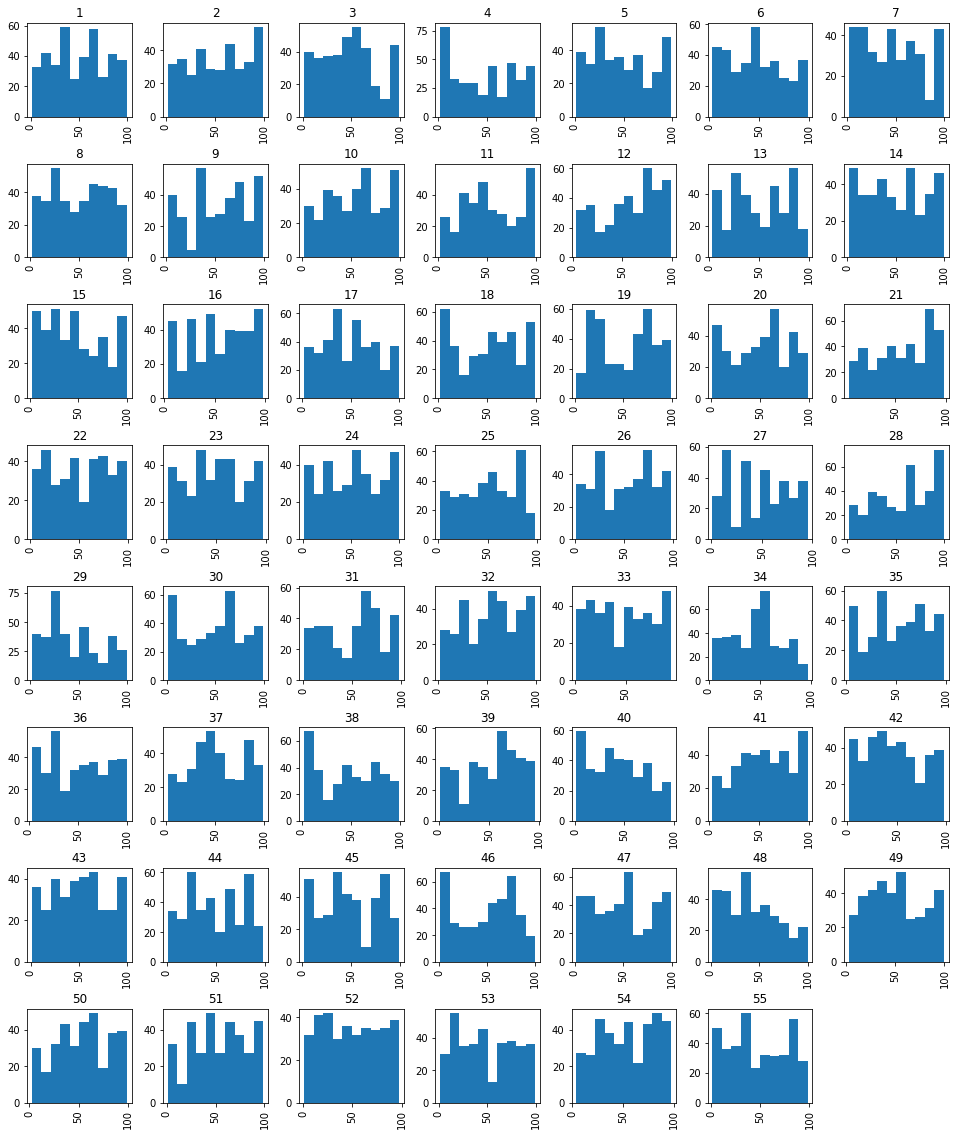

In [80]:
dfset2.MassLoadings.hist(by=dfset2.Analyte,figsize=(16,20))

In [81]:
dfset2.groupby(["Analyte"])["MassLoadings"].describe()

,count,mean,std,min,25%,50%,75%,max
Analyte,,,,,,,,
1,394.0,50.149493,27.936014,1.168080,25.708546,51.490342,72.760417,99.447634
2,350.0,53.558687,29.054429,2.213669,31.256694,53.214933,79.691998,99.084845
3,371.0,47.806475,27.491937,1.316766,27.086236,47.391847,66.692422,99.656957
4,372.0,48.269396,31.447774,1.846249,14.691939,50.172609,76.938158,99.507215
5,352.0,48.671454,29.127942,1.465322,24.273818,43.732516,71.337582,99.318612
6,363.0,47.522193,27.167811,3.244167,25.038096,45.159837,65.506873,98.398306
7,337.0,46.733118,29.160275,1.156934,19.810593,48.012047,68.785590,99.974547
8,390.0,50.434737,27.746510,1.597202,27.891920,51.313435,74.215113,99.111748
9,343.0,54.409337,29.259779,2.281453,33.205558,53.427403,77.032235,99.468847


In [82]:
a=dfset2.groupby(["Analyte"])["MassLoadings"].describe()
a.head()

,count,mean,std,min,25%,50%,75%,max
Analyte,,,,,,,,
1,394.0,50.149493,27.936014,1.168080,25.708546,51.490342,72.760417,99.447634
2,350.0,53.558687,29.054429,2.213669,31.256694,53.214933,79.691998,99.084845
3,371.0,47.806475,27.491937,1.316766,27.086236,47.391847,66.692422,99.656957
4,372.0,48.269396,31.447774,1.846249,14.691939,50.172609,76.938158,99.507215
5,352.0,48.671454,29.127942,1.465322,24.273818,43.732516,71.337582,99.318612


In [83]:
a['SNR']=a['mean']/a['std']
a

,count,mean,std,min,25%,50%,75%,max,SNR
Analyte,,,,,,,,,
1,394.0,50.149493,27.936014,1.168080,25.708546,51.490342,72.760417,99.447634,1.795156
2,350.0,53.558687,29.054429,2.213669,31.256694,53.214933,79.691998,99.084845,1.843391
3,371.0,47.806475,27.491937,1.316766,27.086236,47.391847,66.692422,99.656957,1.738927
4,372.0,48.269396,31.447774,1.846249,14.691939,50.172609,76.938158,99.507215,1.534907
5,352.0,48.671454,29.127942,1.465322,24.273818,43.732516,71.337582,99.318612,1.670954
6,363.0,47.522193,27.167811,3.244167,25.038096,45.159837,65.506873,98.398306,1.749209
7,337.0,46.733118,29.160275,1.156934,19.810593,48.012047,68.785590,99.974547,1.602630
8,390.0,50.434737,27.746510,1.597202,27.891920,51.313435,74.215113,99.111748,1.817697
9,343.0,54.409337,29.259779,2.281453,33.205558,53.427403,77.032235,99.468847,1.859527


In [84]:
a.describe()

,count,mean,std,min,25%,50%,75%,max,SNR
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,363.618182,50.471202,28.256710,1.945437,26.600120,50.657615,74.217288,98.795325,1.789038
std,17.111282,3.203803,1.166113,0.881982,5.029473,5.551391,4.729204,1.144603,0.134218
min,327.000000,42.848172,24.153677,1.019975,14.691939,35.873773,62.401624,94.967618,1.534907
25%,351.000000,48.363603,27.543868,1.276604,23.148389,48.013018,71.636850,98.081486,1.683461
50%,363.000000,50.268820,28.308667,1.618532,26.205254,50.172609,75.029033,99.245427,1.766999
75%,374.000000,52.579670,29.092410,2.352185,30.214856,53.668623,76.674452,99.637168,1.878282
max,399.000000,57.783612,31.447774,4.850490,36.288265,61.919346,85.739733,99.996539,2.089951


#### There is not much difference between the distribution of the analytes

### Removing the substrate effect

In [85]:
dfsub1=dfset2[dfset2['substrate']==1]
dfsub2=dfset2[dfset2['substrate']==2]
dfsub3=dfset2[dfset2['substrate']==3]
dfsub4=dfset2[dfset2['substrate']==4]
dfsub5=dfset2[dfset2['substrate']==5]
dfsub6=dfset2[dfset2['substrate']==6]
dfsub7=dfset2[dfset2['substrate']==7]
dfsub8=dfset2[dfset2['substrate']==8]
dfsub9=dfset2[dfset2['substrate']==9]

In [86]:
dfsub1.head(7)

,0,1,2,3,4,5,6,7,8,9,...,1695,1696,1697,1698,1699,1700,Analyte,substrate,MassLoadings,AddedNoisePerc
1,0.018624,0.012179,0.020924,0.003329,0.014498,0.019329,0.011184,0.010919,0.007558,0.017733,...,0.017089,0.018461,0.020192,0.015228,0.021588,0.012247,1,1,90.481347,0.5
4,0.018868,0.024683,0.016563,0.020112,0.018959,0.017602,0.016099,0.009405,0.020006,0.019105,...,0.015924,0.006780,0.015658,0.017236,0.019725,0.015868,1,1,90.481347,0.5
7,0.014818,0.011101,0.027070,0.006401,0.026437,0.011243,0.025317,0.029137,0.014757,0.022334,...,0.012470,0.020964,0.026032,0.021554,0.020275,0.029800,1,1,90.481347,1.0
14,0.010742,0.003561,0.005192,0.006047,0.008950,0.016127,0.029845,0.012160,0.012476,0.011555,...,0.002927,0.006865,0.022017,0.026592,0.025346,0.005260,1,1,61.657467,1.0
17,0.017717,0.019240,0.026686,0.001046,0.023268,0.022307,0.022895,0.011061,0.000620,-0.001840,...,0.024848,0.003800,0.016240,0.005745,0.020986,0.016599,1,1,61.657467,1.0
18,0.012183,0.010149,0.019891,0.021401,0.013190,0.017779,0.011669,0.013313,0.014122,0.010047,...,0.018881,0.016653,0.019509,0.015716,0.016608,0.009736,1,1,61.657467,0.5
19,0.020778,0.017010,0.016902,0.016768,0.011049,0.024338,0.017163,0.021080,0.019704,0.012417,...,0.021898,0.014643,0.014976,0.015909,0.003378,0.008227,1,1,61.657467,0.5


### 1- CENTERING

In [87]:
mdfsub1=dfsub1.iloc[:,0:1701]
mdfsub2=dfsub2.iloc[:,0:1701]
mdfsub3=dfsub3.iloc[:,0:1701]
mdfsub4=dfsub4.iloc[:,0:1701]
mdfsub5=dfsub5.iloc[:,0:1701]
mdfsub6=dfsub6.iloc[:,0:1701]
mdfsub7=dfsub7.iloc[:,0:1701]
mdfsub8=dfsub8.iloc[:,0:1701]
mdfsub9=dfsub9.iloc[:,0:1701]

In [88]:
y1=subs.loc[0,:]
y2=subs.loc[1,:]
y3=subs.loc[2,:]
y4=subs.loc[3,:]
y5=subs.loc[4,:]
y6=subs.loc[5,:]
y7=subs.loc[6,:]
y8=subs.loc[7,:]
y9=subs.loc[8,:]

In [89]:
modsub1=mdfsub1.apply(lambda x : x -(np.sum(np.array(x)*np.array(y1))/np.sum(np.array(y1)*np.array(y1)))*y1,axis=1)
modsub2=mdfsub2.apply(lambda x : x -(np.sum(np.array(x)*np.array(y2))/np.sum(np.array(y2)*np.array(y2)))*y2,axis=1)
modsub3=mdfsub3.apply(lambda x : x -(np.sum(np.array(x)*np.array(y3))/np.sum(np.array(y3)*np.array(y3)))*y3,axis=1)
modsub4=mdfsub4.apply(lambda x : x -(np.sum(np.array(x)*np.array(y4))/np.sum(np.array(y4)*np.array(y4)))*y4,axis=1)
modsub5=mdfsub5.apply(lambda x : x -(np.sum(np.array(x)*np.array(y5))/np.sum(np.array(y5)*np.array(y5)))*y5,axis=1)
modsub6=mdfsub6.apply(lambda x : x -(np.sum(np.array(x)*np.array(y6))/np.sum(np.array(y6)*np.array(y6)))*y6,axis=1)
modsub7=mdfsub7.apply(lambda x : x -(np.sum(np.array(x)*np.array(y7))/np.sum(np.array(y7)*np.array(y7)))*y7,axis=1)
modsub8=mdfsub8.apply(lambda x : x -(np.sum(np.array(x)*np.array(y8))/np.sum(np.array(y8)*np.array(y8)))*y8,axis=1)
modsub9=mdfsub9.apply(lambda x : x -(np.sum(np.array(x)*np.array(y9))/np.sum(np.array(y9)*np.array(y9)))*y9,axis=1)

In [90]:
subdf=[modsub1,modsub2,modsub3,modsub4,modsub5,modsub6,modsub7,modsub8,modsub9]
cent_subs=pd.concat(subdf)
cent_subs.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
1,0.003758,-0.002548,0.006330,-0.011134,0.000164,0.005120,-0.002903,-0.003049,-0.006294,0.003996,...,-0.010454,0.004719,-0.009114,-0.001578,-0.002636,-0.001219,0.000561,-0.004356,0.002053,-0.007237
4,0.003795,0.009750,0.001765,0.005447,0.004424,0.003195,0.001814,-0.004758,0.005961,0.005176,...,-0.003264,0.001135,-0.008510,-0.000614,-0.004077,-0.013175,-0.004247,-0.002622,-0.000083,-0.003888
7,-0.000993,-0.004563,0.011548,-0.008981,0.011191,-0.003869,0.010334,0.014281,0.000025,0.007723,...,-0.013061,-0.015643,-0.008577,-0.007275,-0.008510,0.000032,0.005153,0.000725,-0.000502,0.009077
14,-0.002610,-0.009667,-0.007915,-0.006943,-0.003925,0.003365,0.017192,-0.000385,0.000035,-0.000783,...,-0.008950,0.013883,-0.006019,0.001276,-0.014789,-0.010811,0.004384,0.009002,0.007801,-0.012240
17,0.005012,0.006652,0.014213,-0.011315,0.011017,0.010163,0.010856,-0.000876,-0.011219,-0.013580,...,0.010754,-0.025940,-0.008090,-0.012333,0.007990,-0.013020,-0.000538,-0.010993,0.004290,-0.000054


### CENTERING AND NORMALIZATION

In [91]:
# Using sklearn
from sklearn.preprocessing import normalize
b=cent_subs.iloc[:,0:1701]
b.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
1,0.003758,-0.002548,0.006330,-0.011134,0.000164,0.005120,-0.002903,-0.003049,-0.006294,0.003996,...,-0.010454,0.004719,-0.009114,-0.001578,-0.002636,-0.001219,0.000561,-0.004356,0.002053,-0.007237
4,0.003795,0.009750,0.001765,0.005447,0.004424,0.003195,0.001814,-0.004758,0.005961,0.005176,...,-0.003264,0.001135,-0.008510,-0.000614,-0.004077,-0.013175,-0.004247,-0.002622,-0.000083,-0.003888
7,-0.000993,-0.004563,0.011548,-0.008981,0.011191,-0.003869,0.010334,0.014281,0.000025,0.007723,...,-0.013061,-0.015643,-0.008577,-0.007275,-0.008510,0.000032,0.005153,0.000725,-0.000502,0.009077
14,-0.002610,-0.009667,-0.007915,-0.006943,-0.003925,0.003365,0.017192,-0.000385,0.000035,-0.000783,...,-0.008950,0.013883,-0.006019,0.001276,-0.014789,-0.010811,0.004384,0.009002,0.007801,-0.012240
17,0.005012,0.006652,0.014213,-0.011315,0.011017,0.010163,0.010856,-0.000876,-0.011219,-0.013580,...,0.010754,-0.025940,-0.008090,-0.012333,0.007990,-0.013020,-0.000538,-0.010993,0.004290,-0.000054


In [92]:
#normalize(b)
b1=b.apply(lambda x: x/(x**2).sum()**.5, axis=1)
b1.head()

,0,1,2,3,4,5,6,7,8,9,...,1691,1692,1693,1694,1695,1696,1697,1698,1699,1700
1,0.013683,-0.009277,0.023046,-0.040534,0.000598,0.018640,-0.010568,-0.011098,-0.022913,0.014546,...,-0.038060,0.017181,-0.033179,-0.005745,-0.009596,-0.004439,0.002042,-0.015857,0.007474,-0.026345
4,0.014017,0.036012,0.006521,0.020120,0.016342,0.011801,0.006702,-0.017573,0.022017,0.019119,...,-0.012055,0.004192,-0.031434,-0.002269,-0.015060,-0.048664,-0.015689,-0.009685,-0.000306,-0.014363
7,-0.002183,-0.010037,0.025400,-0.019754,0.024615,-0.008509,0.022730,0.031412,0.000055,0.016988,...,-0.028728,-0.034407,-0.018864,-0.016001,-0.018717,0.000071,0.011333,0.001596,-0.001104,0.019966
14,-0.005852,-0.021677,-0.017748,-0.015569,-0.008800,0.007546,0.038550,-0.000864,0.000078,-0.001756,...,-0.020068,0.031131,-0.013497,0.002861,-0.033163,-0.024241,0.009831,0.020185,0.017491,-0.027446
17,0.012040,0.015982,0.034147,-0.027185,0.026469,0.024417,0.026080,-0.002106,-0.026952,-0.032626,...,0.025836,-0.062320,-0.019437,-0.029631,0.019195,-0.031281,-0.001292,-0.026410,0.010306,-0.000129


In [93]:
a1=np.array(dfsub1['Analyte'].values.tolist())
a2=np.array(dfsub2['Analyte'].values.tolist())
a3=np.array(dfsub3['Analyte'].values.tolist())
a4=np.array(dfsub4['Analyte'].values.tolist())
a5=np.array(dfsub5['Analyte'].values.tolist())
a6=np.array(dfsub6['Analyte'].values.tolist())
a7=np.array(dfsub7['Analyte'].values.tolist())
a8=np.array(dfsub8['Analyte'].values.tolist())
a9=np.array(dfsub9['Analyte'].values.tolist())
y=np.concatenate((a1,a2,a3,a4,a5,a6,a7,a8,a9),axis=None)
print(np.unique(y,return_counts=True))

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55]), array([394, 350, 371, 372, 352, 363, 337, 390, 343, 352, 327, 370, 345,
       372, 375, 373, 386, 381, 372, 347, 383, 359, 352, 347, 347, 366,
       330, 376, 362, 373, 339, 360, 363, 379, 387, 361, 352, 363, 363,
       367, 364, 388, 346, 378, 371, 387, 399, 337, 370, 342, 342, 356,
       360, 372, 386], dtype=int64))


### KNN

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
# We will find by inspection the best k according to the classifier accuracy on the test set
kVals = range(1, 40, 2)
accuracies = []
X=b1.iloc[:,0:1701]
# We will find by inspection the best k according to the classifier accuracy on the test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
for k in range(1, 40, 2):
    # Entrenar el clasificador  con el valor actual de  `k`
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train, y_train)

    # Evaluar los modelos e imprimiendo sus predicciones
    score = neigh.score(X_test, y_test)
    print("k=%d, accuracy=%.2f%%" % (k, score * 100))
    accuracies.append(score)

k=1, accuracy=42.27%
k=3, accuracy=42.30%
k=5, accuracy=41.85%
k=7, accuracy=42.12%
k=9, accuracy=42.05%
k=11, accuracy=41.70%
k=13, accuracy=41.05%
k=15, accuracy=40.50%
k=17, accuracy=40.08%
k=19, accuracy=39.90%
k=21, accuracy=39.32%
k=23, accuracy=38.73%
k=25, accuracy=38.52%
k=27, accuracy=37.77%
k=29, accuracy=37.28%
k=31, accuracy=36.73%
k=33, accuracy=36.00%
k=35, accuracy=35.38%
k=37, accuracy=34.88%
k=39, accuracy=34.73%


In [95]:
# Hallando el k para el cual la precision es mayor
i = np.argmax(accuracies)
print("k=%d gave the best accuracy %.2f%%" % (kVals[i],
    accuracies[i] * 100))

k=3 gave the best accuracy 42.30%


In [96]:
#metrics for knn
import time
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
neigh = KNeighborsClassifier(n_neighbors=kVals[i])
X=b1.iloc[:,0:1701]
neigh.fit(X, y) 
print("Accuracy estimated by resubstitution", neigh.score(X,y))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
start_time = time.time()
neigh = KNeighborsClassifier(n_neighbors=kVals[i])
neigh.fit(X_train, y_train) 
#Calculating  metrics of prediction
predictions = neigh.predict(X_test)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("The accuracy is=",neigh.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Accuracy estimated by resubstitution 0.567378368918446
F1-score is= 0.4534894060400494
The accuracy is= 0.423
--- 7.29313588142395 seconds ---


In [97]:
#Calculating metrics for each class
print("EVALUATION ON TESTING DATA")
print(classification_report(y_test, predictions))

EVALUATION ON TESTING DATA
              precision    recall  f1-score   support

           1       0.31      0.47      0.37        85
           2       0.24      0.49      0.33        94
           3       0.23      0.56      0.33        62
           4       0.44      0.45      0.44        84
           5       0.29      0.45      0.35        51
           6       0.21      0.61      0.31        66
           7       0.52      0.53      0.52        74
           8       0.46      0.52      0.49        88
           9       0.25      0.48      0.33        60
          10       0.28      0.49      0.36        78
          11       0.33      0.32      0.32        59
          12       0.39      0.37      0.38        78
          13       0.43      0.41      0.42        71
          14       0.48      0.47      0.48        59
          15       0.36      0.39      0.38        71
          16       0.46      0.37      0.41        79
          17       0.63      0.45      0.52        83


### Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
import time
X=b1.iloc[:,0:1701]
#model.fit(X,y)
#model.score(X,y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)
start_time = time.time()
model = LogisticRegression(solver="newton-cg",multi_class="multinomial",max_iter=5000)
model.fit(X_train,y_train)
#Calculating  metrics of prediction
predictions = model.predict(X_test)
#print(predictions)
#print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
#print("precision=",precision_score(y_test,predictions,average="weighted"))
print("The accuracy is=",model.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

The accuracy is= 0.5915
--- 44.05032682418823 seconds ---


### SVM

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
#y=dfsub1['Analyte']
#print(y.value_counts())
X=b1.iloc[:,0:1701]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
#clf=svm.svmSVC(max_iter=2000)
start_time = time.time()
clf=svm.SVC()
clf.fit(X_train, y_train) 
predictions = clf.predict(X_test)
print("F1-score is=",f1_score(y_test,predictions, average="weighted"))
print("precision=",precision_score(y_test,predictions,average="weighted"))
print("The accuracy is=",clf.score(X_test,y_test))
print("--- %s seconds ---" % (time.time() - start_time))

F1-score is= 0.5795125806851632
precision= 0.6805589576870879
The accuracy is= 0.5375
--- 668.0258564949036 seconds ---


### MLP

In [100]:
import tensorflow as tf
from tensorflow import keras
import os
import tempfile
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, roc_auc_score
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import to_categorical
import time

In [101]:
# Configuration options
feature_vector_length = 1701
num_classes = 55
X=b1.iloc[:,0:1701]

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2,random_state=0)
# Convert target classes to categorical ones
ytrain=Y_train-1
ytest=Y_test-1
Y_train = to_categorical(ytrain, num_classes)
Y_test = to_categorical(ytest, num_classes)
print('Train dimension:')
print(X_train.shape)
print('Test dimension:')
print(Y_test.shape)

Train dimension:
(15999, 1701)
Test dimension:
(4000, 55)


In [102]:
# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

# Create the model
model = Sequential()
model.add(Dropout(0.2, input_shape=input_shape))
model.add(Dense(300, input_shape=input_shape, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Feature shape: (1701,)
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 1701)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               510600    
_________________________________________________________________
dense_10 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_11 (Dense)             (None, 55)                11055     
Total params: 581,855
Trainable params: 581,855
Non-trainable params: 0
_________________________________________________________________


In [103]:
# Configure the model and start training
import time
start_time = time.time()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
baseline_history=model.fit(X_train, Y_train, epochs=50, batch_size=150, verbose=1, validation_split=0.2)

Epoch 1/50
86/86 [==============================] - 1s 13ms/step - loss: 3.8536 - accuracy: 0.0740 - val_loss: 3.3858 - val_accuracy: 0.1872
Epoch 2/50
86/86 [==============================] - 1s 11ms/step - loss: 2.6534 - accuracy: 0.3691 - val_loss: 2.1509 - val_accuracy: 0.4863
Epoch 3/50
86/86 [==============================] - 1s 12ms/step - loss: 1.8387 - accuracy: 0.5557 - val_loss: 1.8481 - val_accuracy: 0.5519
Epoch 4/50
86/86 [==============================] - 1s 11ms/step - loss: 1.4932 - accuracy: 0.6301 - val_loss: 1.7347 - val_accuracy: 0.5716
Epoch 5/50
86/86 [==============================] - 1s 11ms/step - loss: 1.2550 - accuracy: 0.6804 - val_loss: 1.6890 - val_accuracy: 0.5906
Epoch 6/50
86/86 [==============================] - 1s 11ms/step - loss: 1.0803 - accuracy: 0.7279 - val_loss: 1.6611 - val_accuracy: 0.5959
Epoch 7/50
86/86 [==============================] - 1s 11ms/step - loss: 0.9300 - accuracy: 0.7595 - val_loss: 1.6721 - val_accuracy: 0.5969
Epoch 8/50
86

In [104]:
print("Training time:---  %s seconds ---" % (time.time() - start_time))
#Test the model after training
start_time=time.time()
test_results = model.evaluate(X_test, Y_test, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
print("--- %s seconds ---" % (time.time() - start_time))

Training time:---  50.26847791671753 seconds ---
125/125 [==============================] - 0s 2ms/step - loss: 2.7053 - accuracy: 0.5612
[2.7053165435791016, 0.5612499713897705]
Test results - Loss: 2.7053165435791016 - Accuracy: 0.5612499713897705%
--- 0.5622231960296631 seconds ---


### CNN

In [105]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
import pandas as pd
import numpy as np
import time
import keras

In [106]:
x=b1.iloc[:,0:1701].to_numpy()
x = x.reshape(x.shape[0], x.shape[1], 1)
print(x.shape)
y=y-1
#print(unique(y))
#print(unique(y).sum())

xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.2)


(19999, 1701, 1)


In [107]:
model = Sequential()
model.add(Conv1D(32, 3, activation="relu", input_shape=(1701,1)))
model.add(Dense(64, activation="relu"))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.5))
model.add(Conv1D(32, 3, activation="relu", input_shape=(1701,1)))
model.add(Dense(64, activation="relu"))
model.add(MaxPooling1D(pool_size=3))
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(55, activation = 'softmax'))
start_time = time.time()
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = "adam", metrics = ['accuracy'])
model.summary()
baseline_history=model.fit(xtrain, ytrain, epochs=30, batch_size=256, verbose=1, validation_split=0.2)
#model.fit(xtrain, ytrain, batch_size=256,epochs=25,  validation_split=.2, verbose=1)
acc = model.evaluate(xtrain, ytrain)
print("Loss:", acc[0], " Accuracy:", acc[1])
print("--- %s seconds ---" % (time.time() - start_time))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (None, 1699, 32)          128       
_________________________________________________________________
dense_12 (Dense)             (None, 1699, 64)          2112      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 566, 64)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 564, 32)           6176      
_________________________________________________________________
dense_13 (Dense)             (None, 564, 64)           2112      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 188, 64)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 12032)            

In [108]:
start_time = time.time()
#Test the model after training
start_time=time.time()
test_results = model.evaluate(xtest, ytest, verbose=1)
print(test_results)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')
print("--- %s seconds ---" % (time.time() - start_time))

125/125 [==============================] - 7s 58ms/step - loss: 5.5955 - accuracy: 0.5683 0s - loss: 5.5823 - accuracy: 0.
[5.595461368560791, 0.5682500004768372]
Test results - Loss: 5.595461368560791 - Accuracy: 0.5682500004768372%
--- 8.09862995147705 seconds ---


### Generating the datasets por CNN-LSTM

In [109]:
X=b1.iloc[:,0:1701]
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2,random_state=0)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)
X_train.to_csv("c:/Users/eacun/NRL/NRLDataset/train/Subs/X_train.csv",index=False,header=False)
X_test.to_csv("c:/Users/eacun/NRL/NRLDataset/test/Subs/X_test.csv",index=False,header=False)

In [110]:
np.savetxt('c:/Users/eacun/NRL/NRLDataset/train/y_train.csv', ytrain) 
np.savetxt('c:/Users/eacun/NRL/NRLDataset/test/y_test.csv', ytest) 